__________________________Task 1__________________________


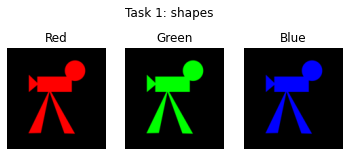

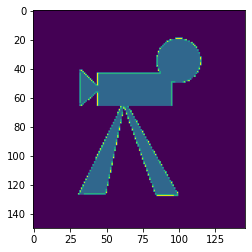


__________________________Task 2__________________________


C:\Users\Kovid\Python\Python37\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


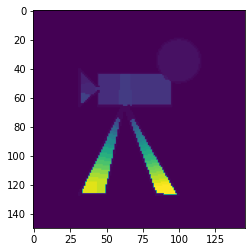

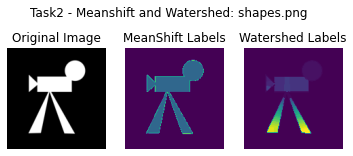

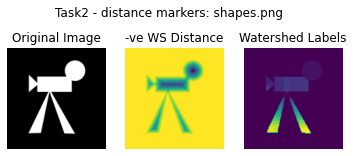

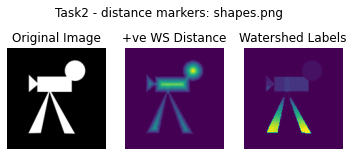




__________________________Task 1__________________________


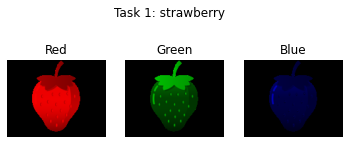

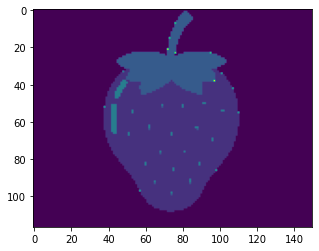


__________________________Task 2__________________________


C:\Users\Kovid\Python\Python37\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


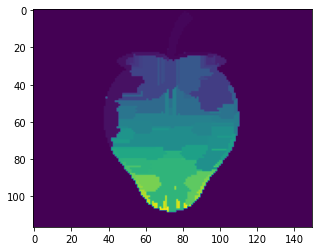

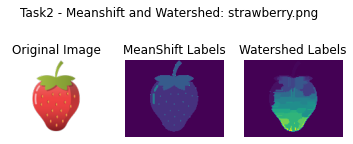

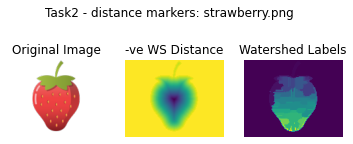

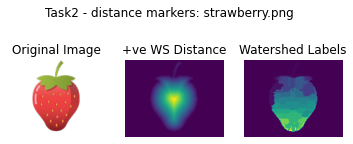

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
import skimage
import cv2

from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift

from PIL import Image

# np.seterr(divide='ignore', invalid='ignore', Binning='ignore')

size = 100, 100

img_names = ["shapes.png", "strawberry.png"]
ext_names = ["coins.png", "kiwi.png"]

images = [i for i in img_names]
ext_images = [i for i in ext_names]

def plot_three_images(figure_title, image1, label1,
                      image2, label2, image3, label3):
    fig = plt.figure()
    fig.suptitle(figure_title, y=0.82)
    # Display the first image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)
    # Display the second image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)
    # Display the third image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)
    plt.show()

for img_path in images:
    img = Image.open(img_path)
    name, ext = img_path.split('.')
    img.thumbnail(size)  # Convert the image to 100 x 100
    # Convert the image to a numpy matrix
    img_mat = np.array(img)[:, :, :3]
    #
    # +--------------------+
    # |     Task 1         | perform MeanShift on image
    # +--------------------+
    #
    print('\033[1m__________________________\033[4mTask 1\033[0m__________________________')
    # Step 1 - Extract the three RGB colour channels
    # Hint: It will be useful to store the shape of one of the colour
    # channels so we can reshape the flattened matrix back to this shape.

    red = np.zeros(img_mat.shape, dtype="uint8")
    red[:,:,0] = img_mat[:,:,0]
    green = np.zeros(img_mat.shape, dtype="uint8")
    green[:,:,1] = img_mat[:,:,1]
    blue = np.zeros(img_mat.shape, dtype="uint8")
    blue[:,:,2] = img_mat[:,:,2]

    flat_shape = red[:,:,0].shape #to be used to flatten matrix
    figure_title = 'Task 1: ' + name
    label1 = 'Red'; label2 = 'Green'; label3 = 'Blue'
    plot_three_images(figure_title, red, label1, green, label2, blue, label3)

    # Step 2 - Combine the three colour channels by flatten each channel 
    # then stacking the flattened channels together.
    # This gives the "colour_samples"
    
    r = red[:,:,0].flatten()
    g = green[:,:,1].flatten()
    b = blue[:,:,2].flatten()
    rgb_stacked = [r, g, b]
    colour_samples = np.column_stack(rgb_stacked)

    # Step 3 - Perform Meanshift  clustering
    # For larger images, this may take a few minutes to compute.
    ms_clf = MeanShift(bin_seeding=True)
    ms_clf_labels = ms_clf.fit(colour_samples)
    labels_unique = np.unique(ms_clf.labels_)
    n_clusters = len(labels_unique[labels_unique >= 0])
#     print('labels_unique:',labels_unique)
#     print("number of estimated clusters :", n_clusters)

    # Step 4 - reshape ms_labels back to the original image shape 
    # for displaying the segmentation output 
    
    ms_labels_flat = ms_clf.labels_
    ms_labels = np.reshape(ms_labels_flat, (flat_shape))
    plt.imshow(ms_labels)
#     plt.savefig('Task1_'+name+'_Mean_Shift.png')
    plt.imsave('Task1_'+name+'_Mean_Shift.png', ms_labels)
    plt.show()
       
#%%
#
# +--------------------+
# |     Task 2         |  perform Watershed on image
# +--------------------+
#
# 
    print('\n\033[1m__________________________\033[4mTask 2\033[0m__________________________')
# Step 1 - Convert the image to gray scale
# and convert the image to a numpy matrix
    img_gray = img.convert('L') # use the mode 'L' instead of 'LA' as the parameter to the convert() method. 'LA' leaves an alpha channel and then the numpy.asarray doesn't work as you intended. If you need the alpha channel, then you will need a different method to convert to a numpy array. Otherwise, use mode 'L'.
    img_array = np.array(img_gray)

    # Step 2 - Calculate the distance transform
    distance = ndi.distance_transform_edt(img_array)

    # Step 3 - Generate the watershed markers
    local_max_values = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=img_array)
    markers = ndi.label(local_max_values)[0]

    # Step 4 - Perform watershed and store the labels
    # Hint: use the watershed() function from the skimage.morphology library
    # with three inputs: -distance, markers and your image array as a mask

    ws_labels = watershed(-distance, markers, mask=img_array)
    plt.imshow(ws_labels)
    plt.savefig('Task2_'+name+'_Watershed_Segmentation.png', bbox_inches='tight')
    plt.show()
    
    # Display the results
    plot_three_images('Task2 - Meanshift and Watershed: '+img_path, img, "Original Image", ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")
    
    # If you want to visualise the watershed distance markers then try
    # plotting the code below.
    plot_three_images('Task2 - distance markers: '+img_path, img, "Original Image", -distance, "-ve WS Distance",
                      ws_labels, "Watershed Labels")
    
    plot_three_images('Task2 - distance markers: '+img_path, img, "Original Image", distance, "+ve WS Distance",
                      ws_labels, "Watershed Labels")
    print('\n\n')


__________________________Task 3__________________________


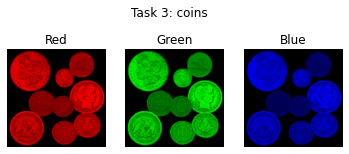

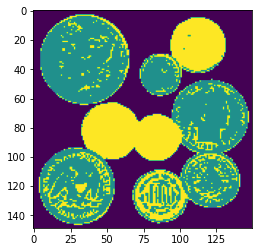

C:\Users\Kovid\Python\Python37\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


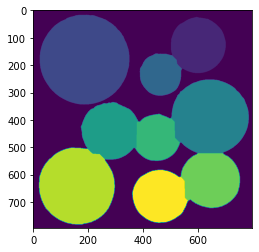

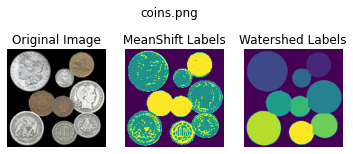


__________________________Task 3__________________________


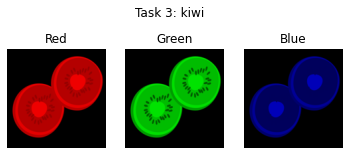

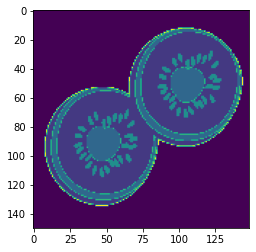

C:\Users\Kovid\Python\Python37\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


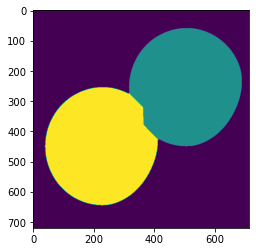

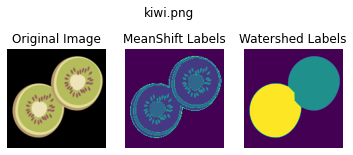

In [2]:
#%%
#
# +-------------------+
# |     Task 3        |
# +-------------------+
#
# Loop for the extension component
for img_path in ext_images:
    img = Image.open(img_path)
    img.thumbnail(size)
    name, ext = img_path.split('.')

    # TODO: perform meanshift on image
    img_mat = np.array(img)[:, :, :3]
    print('\n\033[1m__________________________\033[4mTask 3\033[0m__________________________')
    red = np.zeros(img_mat.shape, dtype="uint8")
    red[:,:,0] = img_mat[:,:,0]
    green = np.zeros(img_mat.shape, dtype="uint8")
    green[:,:,1] = img_mat[:,:,1]
    blue = np.zeros(img_mat.shape, dtype="uint8")
    blue[:,:,2] = img_mat[:,:,2]
    flat_shape = red[:,:,0].shape #to be used to flatten matrix

    figure_title = 'Task 3: ' + name
    label1 = 'Red'; label2 = 'Green'; label3 = 'Blue'
    plot_three_images(figure_title, red, label1, green, label2, blue, label3)
    
    r = red[:,:,0].flatten()
    g = green[:,:,1].flatten()
    b = blue[:,:,2].flatten()
    
    rgb_stacked = [r, g, b]
    colour_samples = np.column_stack(rgb_stacked)
    
    ms_clf = MeanShift(bin_seeding=True)
    ms_clf_labels = ms_clf.fit(colour_samples)

    ms_labels_flat = ms_clf.labels_
    ms_labels = np.reshape(ms_labels_flat, (flat_shape))
    
    plt.imshow(ms_labels)
    plt.savefig('Task3_'+name+'_Mean_Shift.png', bbox_inches='tight')
    plt.show()

    # TODO: perform an optimisation and then watershed on image
    img_gray = img.convert('L') # use the mode 'L' instead of 'LA'
    img_array = np.array(img_gray)
    img_array = cv2.GaussianBlur(img_array,(9,9),cv2.BORDER_DEFAULT)

    thresh = cv2.threshold(img_array, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    D = ndi.distance_transform_edt(thresh)
    localMax = peak_local_max(D, indices=False, min_distance=7, labels=thresh, threshold_abs=7)
    # perform a connected component analysis on the local peaks,using 8-connectivity, then appy the Watershed algorithm
    markers = ndi.label(localMax, structure=np.ones((3, 3)))[0]
    ws_labels = watershed(-D, markers, mask=thresh)
        
    plt.imshow(ws_labels)
    plt.savefig('Task3_'+name+'_Watershed_Segmentation.png', bbox_inches='tight')
    plt.show()
    #Display the results
    plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels", ws_labels, "Watershed Labels")